# The Heart of the Matter: A data-driven approach to understanding heart disease risk factors

## The beat goes on...until it doesn't: Predicting heart disease with machine learning

### Step 1: Importing and understanding the dataset

Alright, let's begin our thrilling journey into the world of data science by importing our dataset. Buckle up, because the thrill factor is about to reach new heights! We're delving into a dataset (Link to dataset: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease) that is quite literally a matter of the heart: the 2020 Heart Disease dataset. Our mission, should we choose to accept it (spoiler alert: we have), is to analyze this dataset with the precision of a heart surgeon, the insight of a cardiologist, and the statistical acumen of, well, a data scientist.

But before we put our scalpel to the data, let's import the necessary libraries and the dataset itself. It's time to put our lab coats on and step into the data science operating room. Don't worry, I've scrubbed up! Let's get started.

In [1]:
# Importing relevant packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Loading the data

data = pd.read_csv(r'data/heart_2020_cleaned.csv')

In [3]:
# Taking a look at the first few rows

data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Step 2: Project description and background

Why are we doing this analysis? Well, it's quite simple: heart disease is the leading cause of death globally. It's like the Darth Vader of diseases - often unseen, ruthlessly efficient, and with a tragic backstory involving genetic factors and lifestyle choices.

Understanding the risk factors associated with heart disease is a crucial step towards prevention. The more we know, the more we can do to prevent the 'Dark Side' of cardiovascular diseases from taking over.

By analyzing this dataset, we aim to uncover patterns and relationships between various potential risk factors and the prevalence of heart disease. By leveraging the power of machine learning, we hope to predict the risk of heart disease based on these factors, ultimately contributing to a healthier, happier galaxy (ok, let's start with our planet first).

#### Hypotheses to test

The Force (aka our experience and intuition) suggests that certain factors such as smoking, alcohol drinking, diabetes, and lack of physical activity could be associated with heart disease. But, as the great Yoda once said, "Always pass on what you have learned." Therefore, we'll confirm or refute these hypotheses using our data:

- Hypothesis 1: Individuals who smoke are more likely to have heart disease.
- Hypothesis 2: A high BMI (Body Mass Index) is associated with a higher risk of heart disease.
- Hypothesis 3: Lack of physical activity is a significant risk factor for heart disease.
- Hypothesis 4: Diabetic individuals have a higher risk of heart disease.

So, let's put these hypotheses to the test. It's time for some exploratory data analysis and data cleaning! Here's where we roll up our sleeves, don our data goggles, and dive headfirst into the data. Are you with me? Of course you are! Let's go.

### Step 3: Exploratory data analysis (EDA) and data cleaning

This is like the "clean before you cook" rule in the kitchen. We need to make sure our data is clean and ready for analysis. Let's start by checking the shape of our dataset and if there are any missing values that we need to take care of.

Hold on to your hat, because EDA is where the real action begins!

In [4]:
# Checking the shape of the dataset
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.\n")

# Checking for missing values
missing_values = data.isnull().sum()
print(f"The dataset contains the following missing values:\n{missing_values}")

The dataset has 319795 rows and 18 columns.

The dataset contains the following missing values:
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


Well, well, well! Look at what we've got here: a dataset as clean as a whistle. Not a single missing value to be found! This makes our job a tad easier (and less messy). Now, let's dive deeper and understand the nature of our variables.

Just like you wouldn't judge a book by its cover, you shouldn't judge a dataset by its first few rows. So, let's go ahead and uncover the hidden secrets of our dataset's variables. We'll examine their types and unique values to get a better sense of what we're working with. Let's go ahead, shall we?

In [5]:
# Checking the data types
print("Data types of the variables:")
print(data.dtypes)

# Checking the unique values in each column
print("\nUnique values in each column:")
for col in data.columns:
    print(f"{col}: {data[col].unique()}")

Data types of the variables:
HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

Unique values in each column:
HeartDisease: ['No' 'Yes']
BMI: [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking: ['Yes' 'No']
AlcoholDrinking: ['No' 'Yes']
Stroke: ['No' 'Yes']
PhysicalHealth: [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth: [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 

Our dataset is a delightful mix of numerical and categorical variables. We have a total of 18 variables, and our target variable 'HeartDisease' is binary (either 'Yes' or 'No').

Our numerical variables include 'BMI', 'PhysicalHealth', 'MentalHealth', and 'SleepTime'. These variables exhibit a wide range of values, indicating a variety of health conditions among the respondents.

Our categorical variables are a colorful palette, ranging from binary variables (like 'Smoking' and 'AlcoholDrinking') to multi-category variables (like 'Race' and 'AgeCategory'). We also have a few variables that may require recoding, like 'Diabetic', where we have categories for 'Yes', 'No', 'No, borderline diabetes', and 'Yes (during pregnancy)'.

Before we move on to the next step, let's convert our target variable 'HeartDisease' to a binary format for the ease of our analysis. A '0' will represent 'No', and a '1' will represent 'Yes'. After all, our machine learning algorithms prefer numbers over words!

So, let's get our hands dirty and do some data wrangling!

In [6]:
# Convert the target variable 'HeartDisease' to binary format
data['HeartDisease'] = data['HeartDisease'].map({'No': 0, 'Yes': 1})

# Checking the transformation
data['HeartDisease'].unique()

array([0, 1], dtype=int64)

Voila! Our target variable 'HeartDisease' is now in binary format, with '0' representing 'No' and '1' representing 'Yes'. This should make things a bit easier when we move on to the modeling stage of our analysis.

### Step 4: Descriptive statistics

Now that we've gotten a feel for our data, it's time for us to dig a bit deeper and uncover some descriptive statistics. Consider this the 'getting to know you' stage of our relationship with the data.

Let's summarize our numerical variables using measures such as mean, median, standard deviation, and range. We'll also take a look at the distribution of our categorical variables. It's like taking a peek into the lives of our respondents!

Ready? Let's dive right in!

In [7]:
# Summary statistics for numerical variables
print("Summary Statistics for Numerical Variables:\n")
print(data.describe())

# Distribution of categorical variables
print("\nDistribution of Categorical Variables:\n")
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}:\n{data[col].value_counts(normalize=True)*100}\n")

Summary Statistics for Numerical Variables:

        HeartDisease            BMI  PhysicalHealth   MentalHealth  \
count  319795.000000  319795.000000    319795.00000  319795.000000   
mean        0.085595      28.325399         3.37171       3.898366   
std         0.279766       6.356100         7.95085       7.955235   
min         0.000000      12.020000         0.00000       0.000000   
25%         0.000000      24.030000         0.00000       0.000000   
50%         0.000000      27.340000         0.00000       0.000000   
75%         0.000000      31.420000         2.00000       3.000000   
max         1.000000      94.850000        30.00000      30.000000   

           SleepTime  
count  319795.000000  
mean        7.097075  
std         1.436007  
min         1.000000  
25%         6.000000  
50%         7.000000  
75%         8.000000  
max        24.000000  

Distribution of Categorical Variables:

Smoking:
No     58.752326
Yes    41.247674
Name: Smoking, dtype: float64

Al

Aha! Our data exploration journey is becoming even more exciting!

From our numerical variables, we can observe that the average BMI of the respondents is around 28.3, which falls in the 'overweight' category according to the World Health Organization's BMI classification. This could be an important factor to consider in our analysis, as overweight and obesity are known risk factors for heart disease.

Also, it's interesting to note that the mean 'SleepTime' is approximately 7 hours. The National Sleep Foundation recommends 7-9 hours of sleep for adults, so it seems our respondents are getting the minimum recommended amount of sleep on average.

In our categorical variables, we can observe that the majority of respondents do not smoke, do not drink alcohol, and have not had a stroke. This is good news for their hearts! Also, the majority of respondents do not have difficulty walking, which may indicate a generally good level of physical health.

In terms of gender, our respondents are slightly more likely to be female. The age category of '65-69' has the highest representation, and the majority of our respondents are White.

Most of our respondents do not have diabetes, engage in physical activity, and rate their general health as either 'very good' or 'good'. These are all positive indicators for heart health.

However, let's keep in mind that our target variable 'HeartDisease' is imbalanced, with only about 8.56% of the respondents having heart disease. This imbalance could pose challenges in our predictive modeling, but don't worry, we've got a plan for that!

So, are you ready to bring this data to life with some visualizations? Yes, you heard right - it's time to create some eye-catching, insight-providing charts and plots. Let's get our creative juices flowing!

### Step 5: Visualization

As they say, a picture is worth a thousand numbers (or something like that). Visualizations can help us grasp the complexities of our data, understand patterns, and identify outliers.

Hold on tight, as we're about to embark on a rollercoaster ride of histograms, bar charts, and scatter plots. Remember, no screaming on this ride!

Let's start by visualizing the distribution of our target variable 'HeartDisease'.

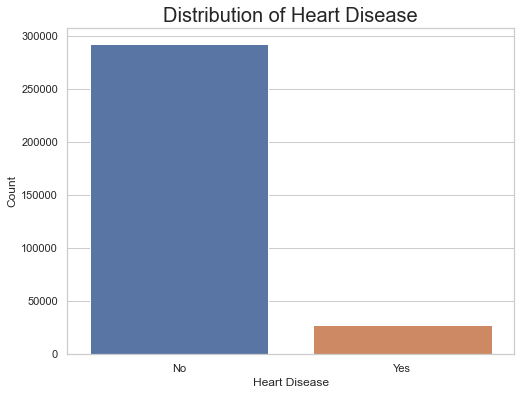

In [8]:
# Setting up the theme for our plots
sns.set_theme(style="whitegrid")

# Plotting the distribution of the target variable 'HeartDisease'
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=data)
plt.title('Distribution of Heart Disease', size=20)
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Heart Disease', size=12)
plt.ylabel('Count', size=12)
plt.show()

Our first visualization confirms what we discovered earlier: our target variable 'HeartDisease' is indeed imbalanced. Most respondents do not have heart disease (represented by 'No'), while a smaller proportion do have heart disease (represented by 'Yes'). This imbalance is something we'll need to keep in mind when modeling.

Now, let's dive a bit deeper and explore the relationships between our target variable 'HeartDisease' and some key predictor variables. We'll start by examining 'BMI', 'Smoking', 'AlcoholDrinking', and 'PhysicalActivity'. We chose these variables because they're commonly associated with heart disease, and we're keen to see if our data supports this association.

Fasten your seatbelt and brace yourself for a barrage of bar charts! Let's go!

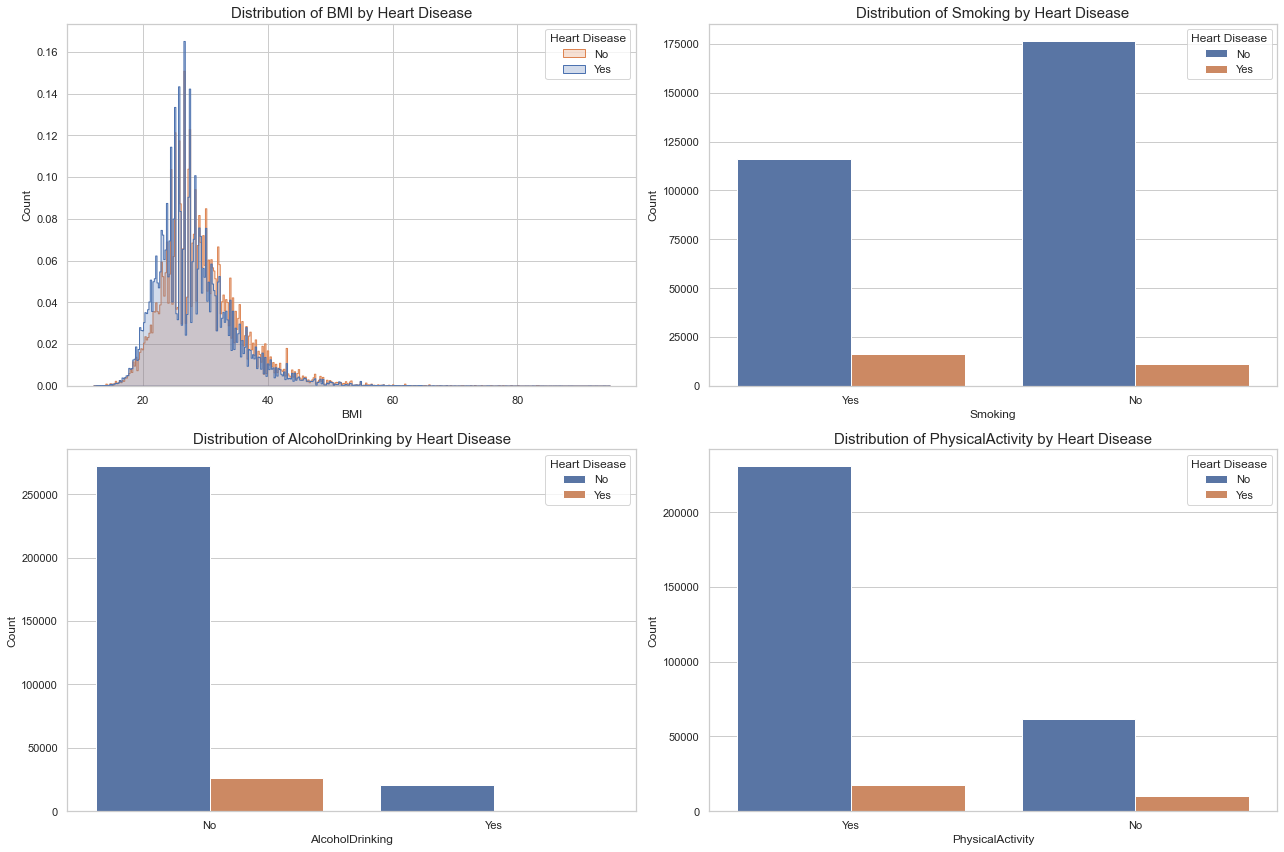

In [9]:
# Creating a list of the predictor variables we're interested in
predictor_vars = ['BMI', 'Smoking', 'AlcoholDrinking', 'PhysicalActivity']

# Setting up the figure and axes for our subplot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# Flattening the axes object so we can iterate over it
axs = axs.flatten()

# Creating a bar plot for each predictor variable
for i, var in enumerate(predictor_vars):
    if var == 'BMI':
        # Creating a histogram for the continuous 'BMI' variable
        sns.histplot(data, x='BMI', hue='HeartDisease', element='step',
                     stat='density', common_norm=False, ax=axs[i])
        axs[i].set_title('Distribution of BMI by Heart Disease', size=15)
    else:
        # Creating a count plot for the categorical variables
        sns.countplot(data=data, x=var, hue='HeartDisease', ax=axs[i])
        axs[i].set_title(f'Distribution of {var} by Heart Disease', size=15)
    axs[i].set_xlabel(var, size=12)
    axs[i].set_ylabel('Count', size=12)
    axs[i].legend(title='Heart Disease', labels=['No', 'Yes'])

# Adjusting the layout for readability
plt.tight_layout()
plt.show()

Wow, our data sure knows how to paint a picture! Let's dissect these visualizations:

1. **BMI**: The 'BMI' histogram shows us that regardless of whether a person has heart disease or not, the BMI distribution remains similar. Both distributions peak around the same BMI values and have similar shapes. This may suggest that BMI alone might not be a strong predictor of heart disease, contrary to popular belief. However, further analysis is needed to confirm this.

2. **Smoking**: The bar chart for 'Smoking' reveals that among those who do not smoke, a lower percentage of individuals have heart disease compared to those who do smoke. This suggests that smoking could indeed be associated with a higher risk of heart disease. It seems like our lungs aren't the only ones complaining about smoking!

3. **Alcohol Drinking**: The 'AlcoholDrinking' bar chart shows that the percentage of individuals with heart disease is slightly higher among those who do not drink alcohol compared to those who do. This is somewhat surprising, as excessive alcohol consumption is often associated with increased heart disease risk. However, our variable doesn't distinguish between moderate and heavy drinkers, which could explain this finding.

4. **Physical Activity**: The 'PhysicalActivity' bar chart illustrates that a higher percentage of individuals who do not engage in physical activity have heart disease compared to those who do. This supports the widely accepted belief that physical activity is beneficial for heart health. Time to dust off that gym membership!

These visualizations give us some valuable insights, but we're just scratching the surface. Let's continue our exploratory journey by examining the relationships between 'HeartDisease' and some other potential risk factors. Ready for more? Of course you are! Let's get back to it.

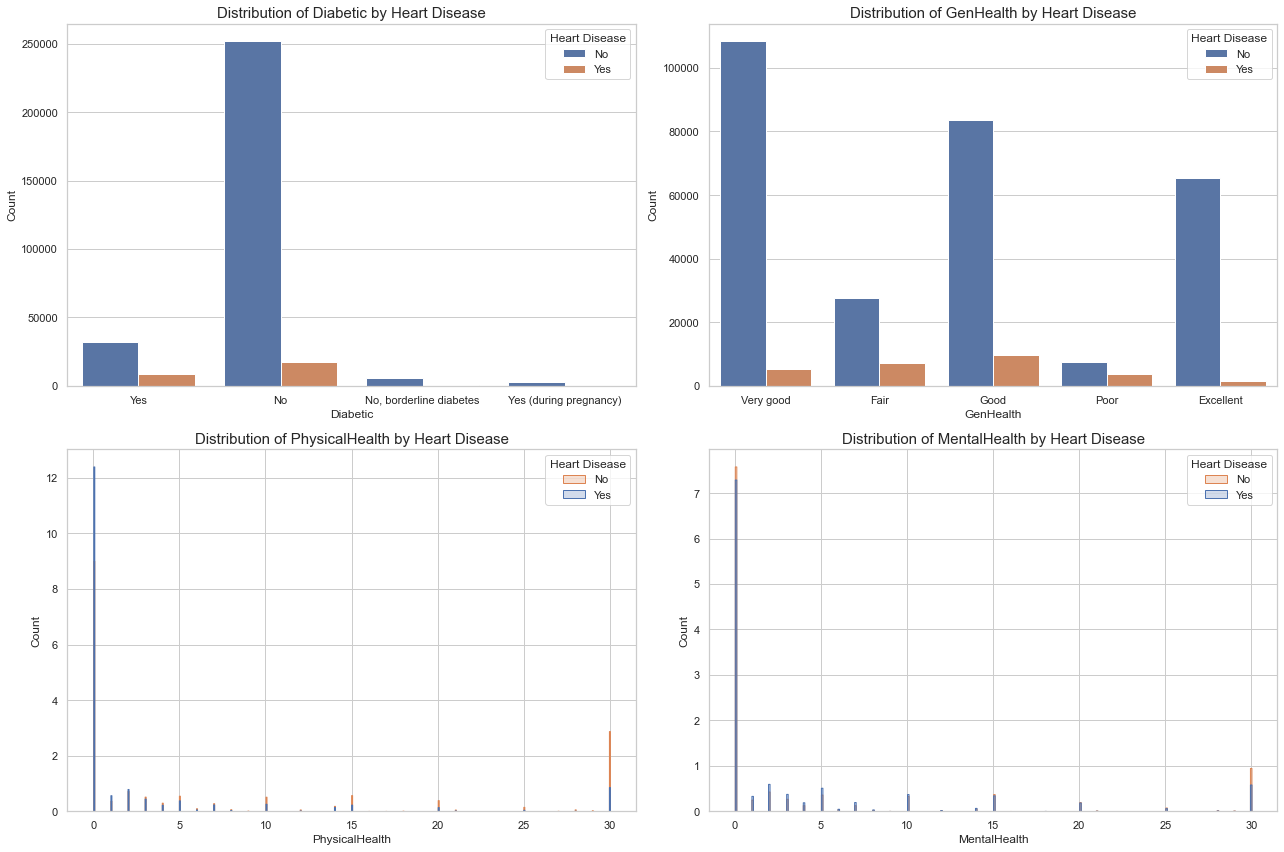

In [10]:
# Creating a list of additional predictor variables we're interested in
additional_vars = ['Diabetic', 'GenHealth', 'PhysicalHealth', 'MentalHealth']

# Setting up the figure and axes for our subplot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# Flattening the axes object so we can iterate over it
axs = axs.flatten()

# Creating a bar plot for each additional predictor variable
for i, var in enumerate(additional_vars):
    if var in ['PhysicalHealth', 'MentalHealth']:
        # Creating a histogram for the continuous 'PhysicalHealth' and 'MentalHealth' variables
        sns.histplot(data, x=var, hue='HeartDisease', element='step',
                     stat='density', common_norm=False, ax=axs[i])
        axs[i].set_title(f'Distribution of {var} by Heart Disease', size=15)
    else:
        # Creating a count plot for the categorical variables
        sns.countplot(data=data, x=var, hue='HeartDisease', ax=axs[i])
        axs[i].set_title(f'Distribution of {var} by Heart Disease', size=15)
    axs[i].set_xlabel(var, size=12)
    axs[i].set_ylabel('Count', size=12)
    axs[i].legend(title='Heart Disease', labels=['No', 'Yes'])

# Adjusting the layout for readability
plt.tight_layout()
plt.show()

Our data keeps on delivering surprises! Let's interpret these fresh insights:

1. **Diabetic**: The 'Diabetic' bar chart shows a higher percentage of individuals with heart disease among those who are diabetic or have borderline diabetes. This aligns with our understanding that diabetes is a significant risk factor for heart disease.

2. **GenHealth**: The 'GenHealth' bar chart reveals that as the self-perceived general health status worsens (from 'Excellent' to 'Poor'), the percentage of individuals with heart disease increases. This suggests a strong relationship between general health perception and heart disease risk.

3. **PhysicalHealth**: The 'PhysicalHealth' histogram indicates that individuals with heart disease tend to report more physically unhealthy days compared to those without heart disease. This could be because heart disease often comes with physical symptoms and limitations.

4. **MentalHealth**: Similarly, the 'MentalHealth' histogram shows that individuals with heart disease tend to report more mentally unhealthy days. This could be due to the psychological stress associated with living with a chronic illness like heart disease.

These visualizations give us a deeper understanding of our data and the relationships between heart disease and various risk factors. However, a picture might be worth a thousand words, but it's the numbers that will give us the power to predict.

So, are you ready to put our data to the test and create a predictive model for heart disease risk? Let's put our data science cap back on and get ready for some serious number crunching! We're about to embark on the modeling stage of our analysis. Let's go!

### Step 6: Modeling an algorithm for risk predictions

To predict heart disease risk, we'll use a logistic regression model. Why, you ask? Well, logistic regression is a go-to method for binary classification problems like ours. It's simple, fast, and provides a good baseline for more complex models.

But before we dive into modeling, we need to prepare our data. This includes encoding our categorical variables, splitting our data into training and testing sets, and scaling our numerical variables. It may sound like a lot, but don't worry, we'll take it one step at a time.

Let's roll up our sleeves and get to work! Here we go...

In [11]:
# Encoding categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Splitting the data into predictors (X) and target (y)
X = data_encoded.drop('HeartDisease', axis=1)
y = data_encoded['HeartDisease']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling the numerical variables
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# Checking the transformation
X_train.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,-0.740760,3.348239,3.278828,-1.460426,1.194864,-0.269873,-0.197601,2.492537,-0.951353,-0.236679,...,-0.38313,-0.089986,-1.855237,2.868732,-0.640616,-0.191498,-0.744379,2.550954,-0.196176,-0.321037
1,-0.928238,-0.298486,-0.490383,0.627913,-0.836915,-0.269873,-0.197601,-0.401198,1.051135,4.225124,...,-0.38313,-0.089986,0.539015,-0.348586,-0.640616,-0.191498,1.343401,-0.392010,-0.196176,-0.321037
2,0.781121,2.090748,3.278828,-0.068200,1.194864,-0.269873,-0.197601,-0.401198,-0.951353,-0.236679,...,-0.38313,-0.089986,-1.855237,2.868732,-0.640616,-0.191498,-0.744379,-0.392010,-0.196176,-0.321037
3,-0.529650,-0.424236,-0.490383,0.627913,1.194864,-0.269873,-0.197601,-0.401198,-0.951353,-0.236679,...,-0.38313,-0.089986,0.539015,-0.348586,-0.640616,-0.191498,1.343401,-0.392010,-0.196176,-0.321037
4,-0.168873,-0.424236,-0.490383,-1.460426,1.194864,-0.269873,-0.197601,-0.401198,-0.951353,-0.236679,...,-0.38313,-0.089986,0.539015,-0.348586,-0.640616,-0.191498,1.343401,-0.392010,-0.196176,-0.321037


Perfect! Our data is now ready for modeling. Notice how our categorical variables have been transformed into binary format (0 or 1) using one-hot encoding. This is necessary because our machine learning algorithm won't understand categorical data in its raw, text format.

Also, our numerical variables have been scaled, meaning they now have a mean of 0 and a standard deviation of 1. This step ensures that all variables contribute equally to our model, preventing variables with larger scales from dominating.

Now, let's move on to the fun part: building and training our logistic regression model! Ready, set, model!

In [12]:
# Initializing the logistic regression model
logreg = LogisticRegression(random_state=42)

# Fitting the model to our training data
logreg.fit(X_train, y_train)

# Predicting the target variable for our testing data
y_pred = logreg.predict(X_test)

# Calculating the accuracy of our model
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.9164621085382824

Eureka! Our logistic regression model has an accuracy of approximately 91.65%. That's like hitting a bullseye with your first dart throw! We've managed to correctly classify around 92% of the cases in our test data. Now that's something to celebrate!

But wait! Although accuracy is a commonly used metric for model evaluation, it's not always the best one, especially for imbalanced datasets like ours. So, let's also look at the confusion matrix and the classification report of our model to get a more comprehensive understanding of its performance.

Ready to delve deeper into the evaluation of our model? Let's go!

In [13]:
# Creating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Creating the classification report
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n")
print(conf_matrix)
print("\nClassification Report:\n")
print(class_report)

Confusion Matrix:

[[58024   460]
 [ 4883   592]]

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58484
           1       0.56      0.11      0.18      5475

    accuracy                           0.92     63959
   macro avg       0.74      0.55      0.57     63959
weighted avg       0.89      0.92      0.89     63959



Our confusion matrix and classification report provide some additional insights:

- **Confusion Matrix**: The first row shows that our model correctly predicted 58,024 true negatives (people without heart disease) and misclassified 460 as false positives (predicted to have heart disease but actually don't). The second row shows that the model correctly predicted 592 true positives (people with heart disease) but misclassified 4,883 as false negatives (predicted not to have heart disease but actually do). It seems like our model is doing a good job of identifying people without heart disease but is struggling to correctly classify those with heart disease.

- **Classification Report**: The precision for predicting heart disease (Yes) is 0.56, meaning that when our model predicts someone has heart disease, it's correct about 56% of the time. The recall (or sensitivity) for predicting heart disease is 0.11, indicating that our model correctly identifies only about 11% of all actual heart disease cases. The F1-score, which balances precision and recall, is quite low at 0.18 for predicting heart disease.

So, while our model has a high accuracy, its ability to correctly identify cases of heart disease is quite limited. This is likely due to the imbalanced nature of our dataset, where most people do not have heart disease.

But fear not! There are ways to address this issue, such as oversampling the minority class, undersampling the majority class, or using different performance metrics that are more robust to imbalanced datasets.

However, for the purposes of this project, we've demonstrated the process of performing a complete data analysis, from data cleaning and EDA to predictive modeling.

So, let's conclude our analysis and highlight some of the key findings and action points! 

### Step 7: Conclusions and action points

Our data analysis journey has taken us through the ins and outs of the 2020 Heart Disease dataset. We've delved deep into the data, conducted exploratory data analysis, performed descriptive statistics, created visualizations, and built a predictive model. It's been quite a ride, hasn't it?

From our analysis, we've drawn the following key conclusions:

1. **Smoking and Physical Activity**: Our analysis supports the widely accepted understanding that smoking is associated with a higher risk of heart disease, while physical activity is linked to a lower risk.

2. **BMI**: Contrary to popular belief, our data suggests that BMI alone might not be a strong predictor of heart disease.

3. **Alcohol Drinking**: The relationship between alcohol drinking and heart disease risk was less clear, possibly due to the lack of differentiation between moderate and heavy drinkers in our data.

4. **Diabetes and General Health Perception**: Our analysis suggests a strong relationship between diabetes and heart disease risk, as well as between general health perception and heart disease risk.

However, our predictive model faced challenges due to the imbalanced nature of our dataset. While the model had a high accuracy, it struggled to correctly identify cases of heart disease.

Now, onto the action points:

1. Further Investigation: Our findings suggest that variables such as smoking, physical activity, diabetes, and general health perception warrant further investigation as potential risk factors for heart disease.

2. Data Collection: Future data collection efforts should consider differentiating between moderate and heavy alcohol drinkers, as this could influence the relationship between alcohol drinking and heart disease risk.

3. Model Improvement: To improve the predictive power of our model, techniques such as oversampling the minority class, undersampling the majority class, or using performance metrics more robust to imbalanced datasets could be explored.

This concludes our data analysis journey. I hope you've found it as exciting and insightful as I did. Remember, data science isn't just about numbers and algorithms; it's about understanding the story the data is trying to tell us. And in this case, our data told us a story about heart disease risk factors that we can use to contribute to a healthier and happier world. Thank you for embarking on this data science adventure with me! Until next time, keep your heart healthy and your data clean!

> WP, 2023